In [1]:
from ecgtizer.ecgtizer import ECGtizer
import os
from tqdm import tqdm
import warnings
import torch
warnings.filterwarnings("ignore")


# Example of using ECGtizer

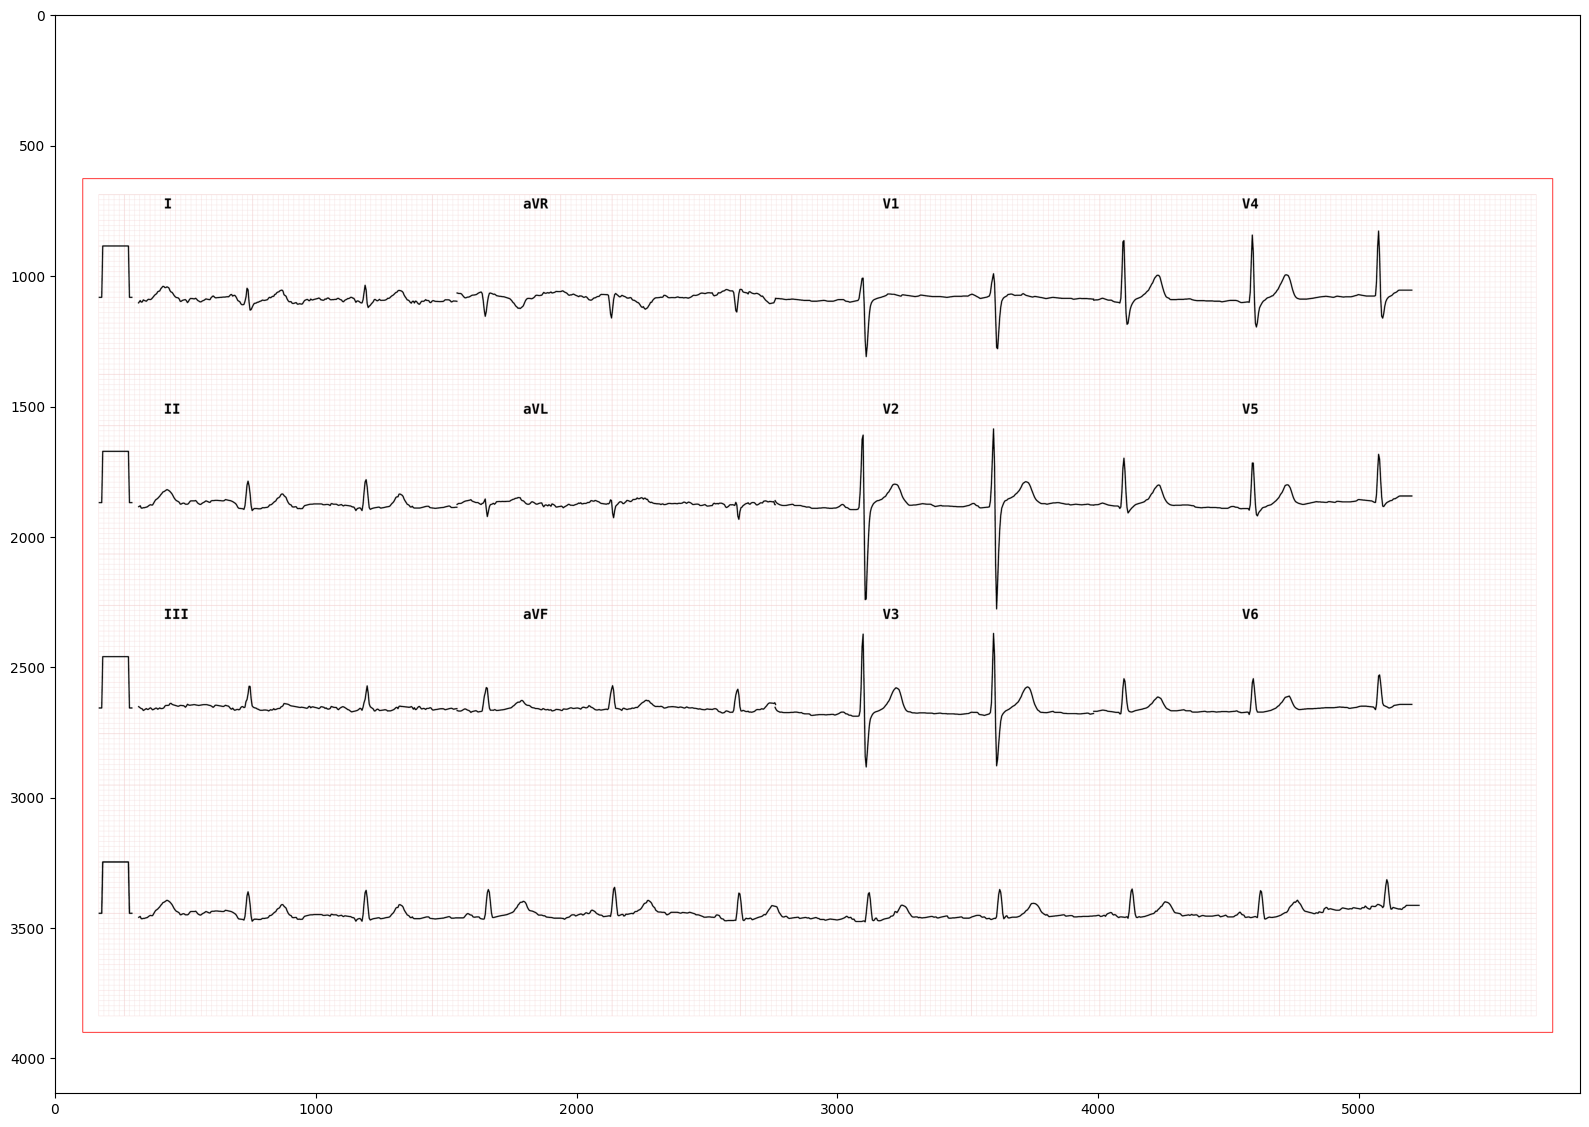

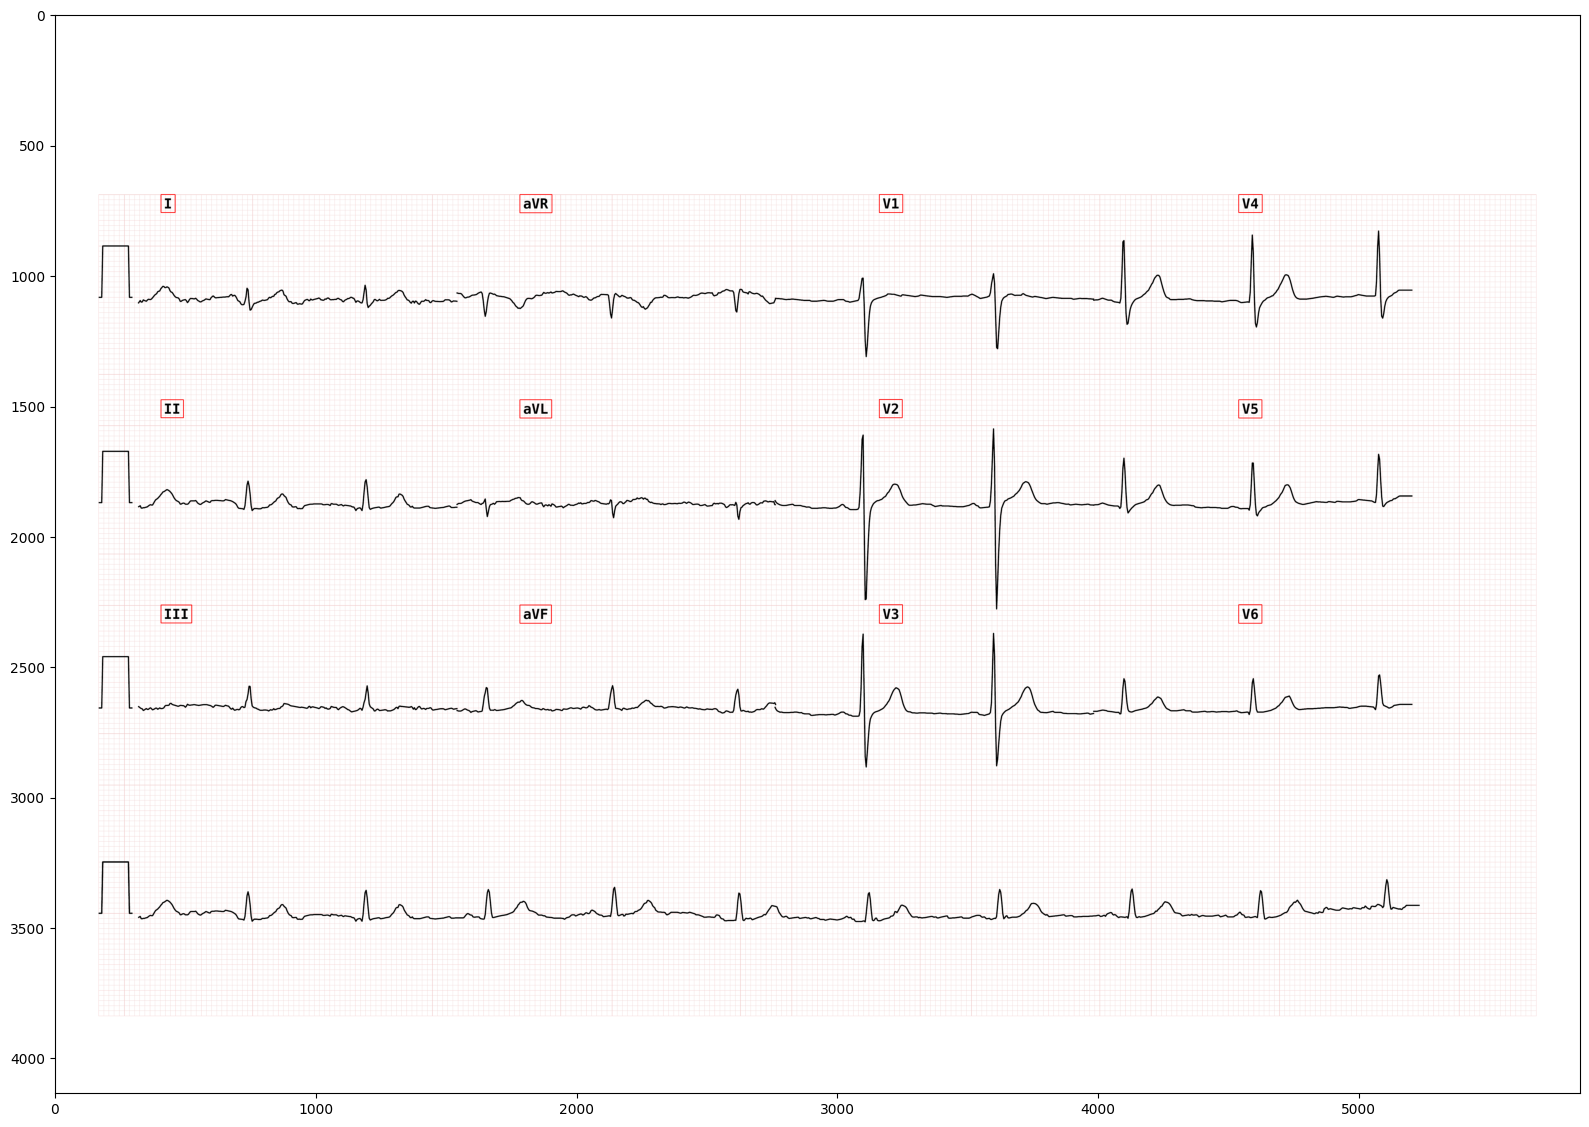

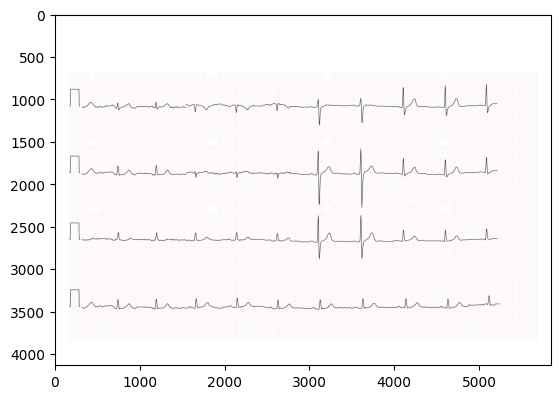

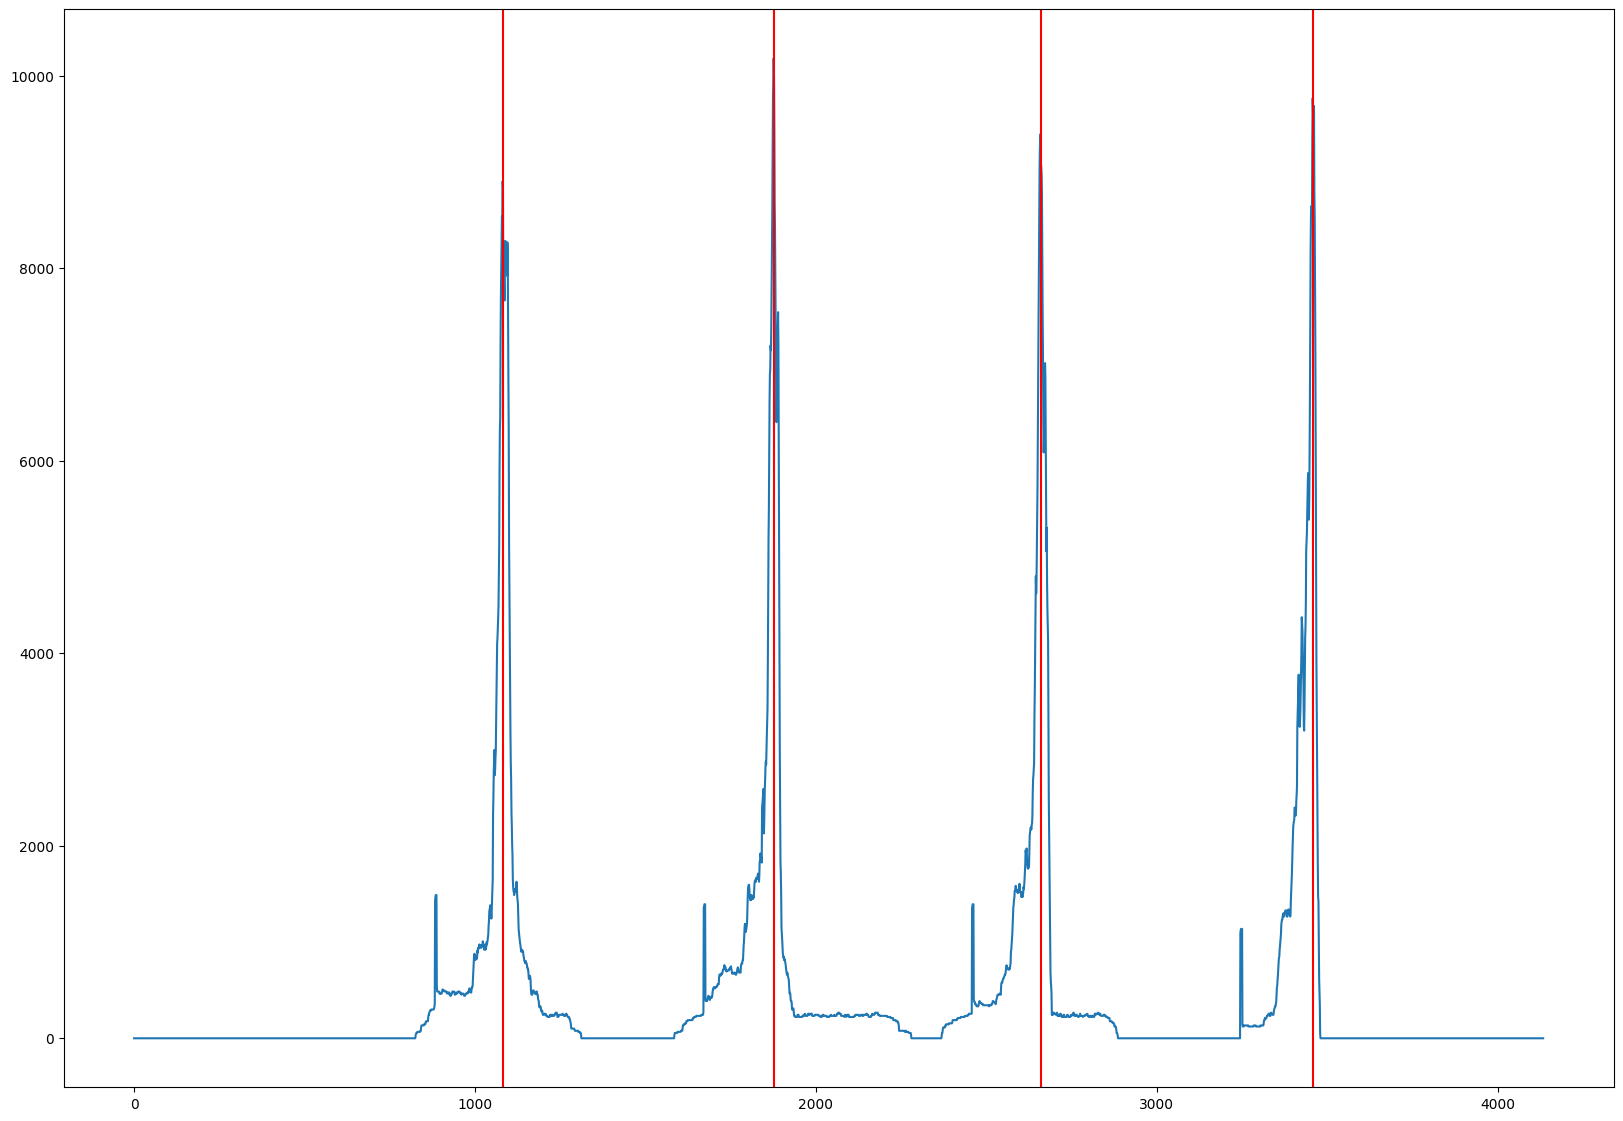

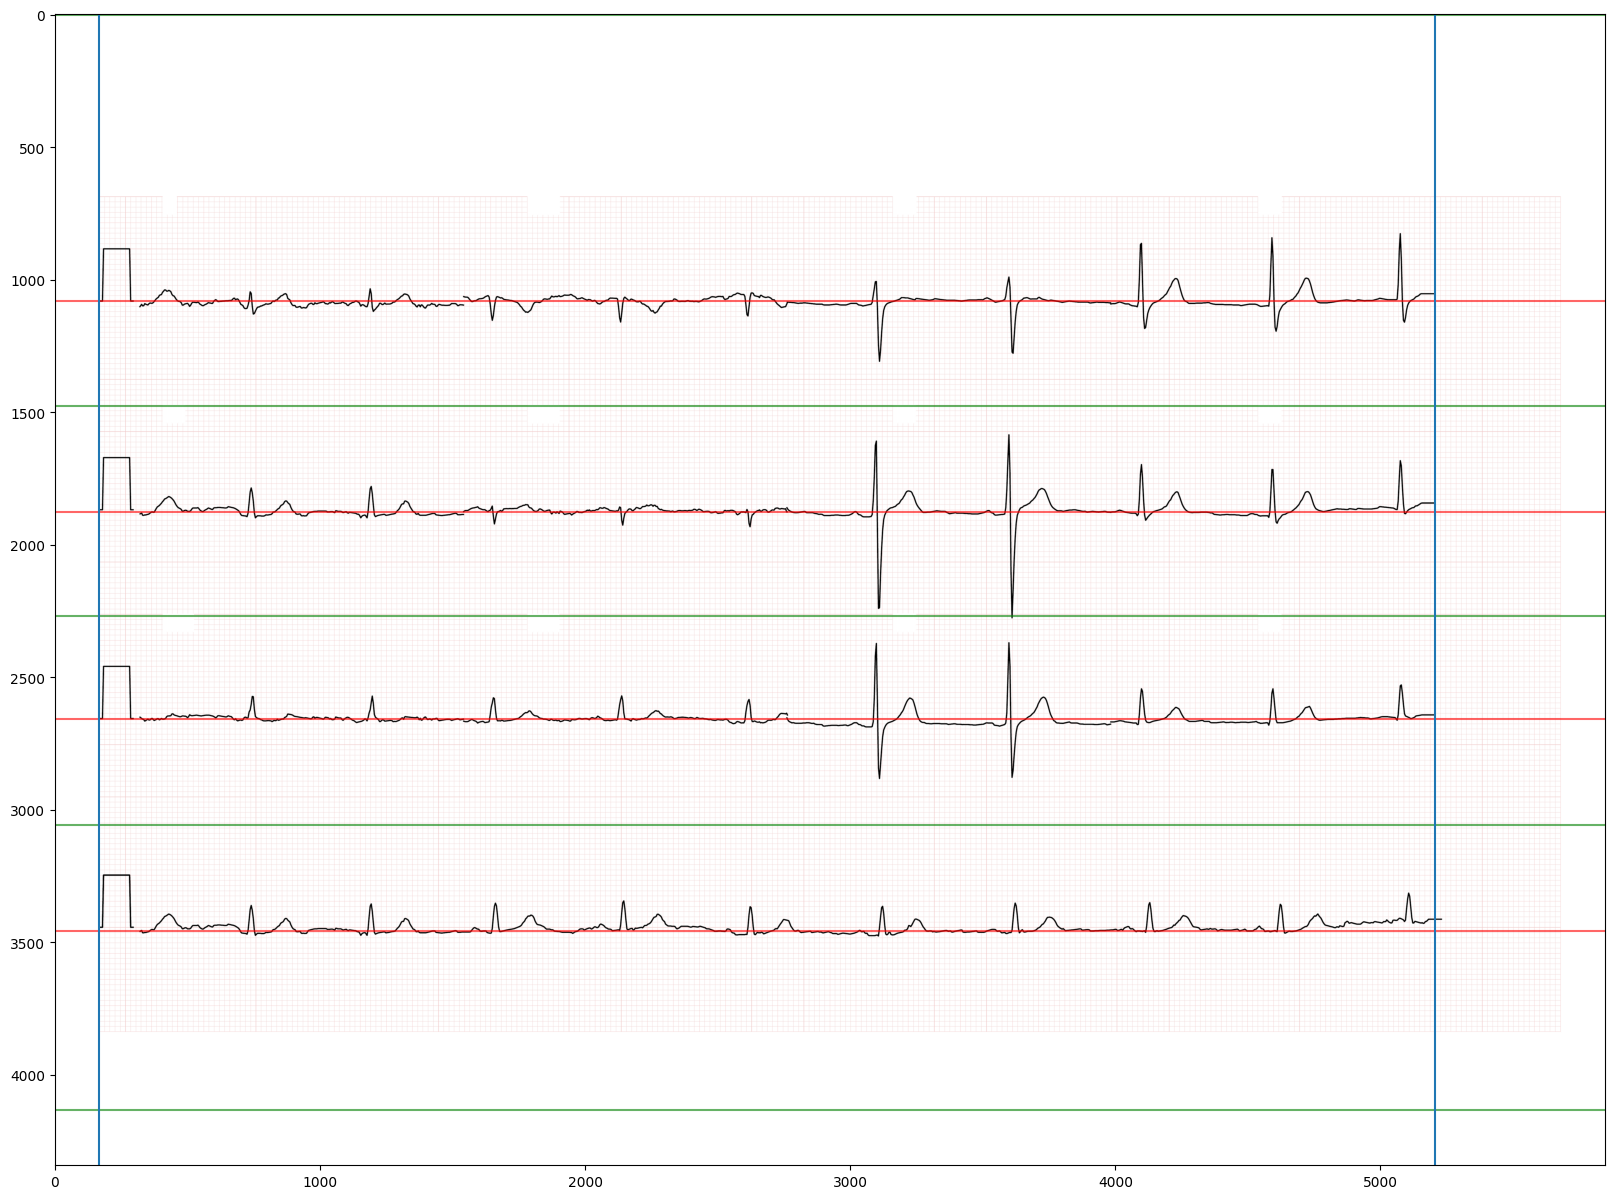

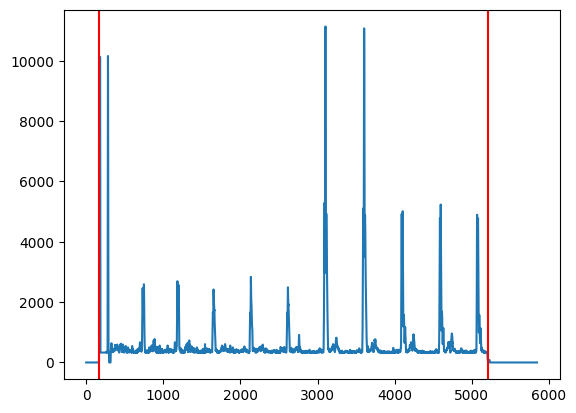

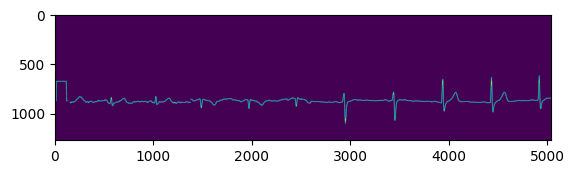

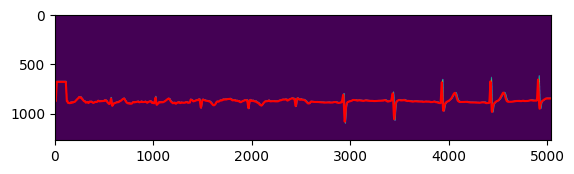

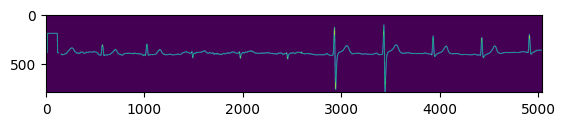

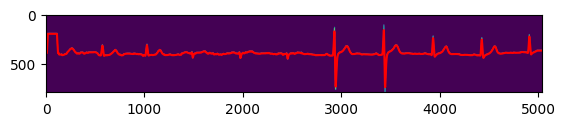

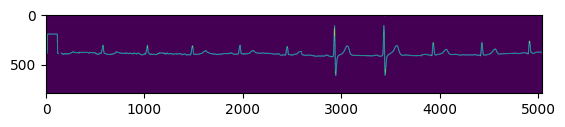

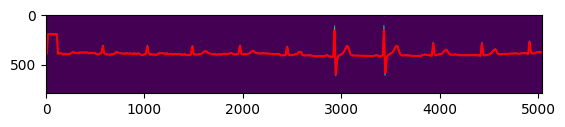

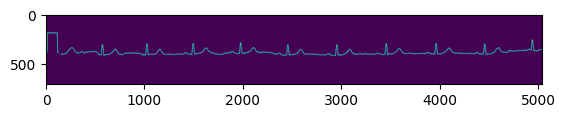

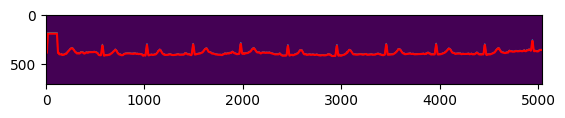

Track : 0


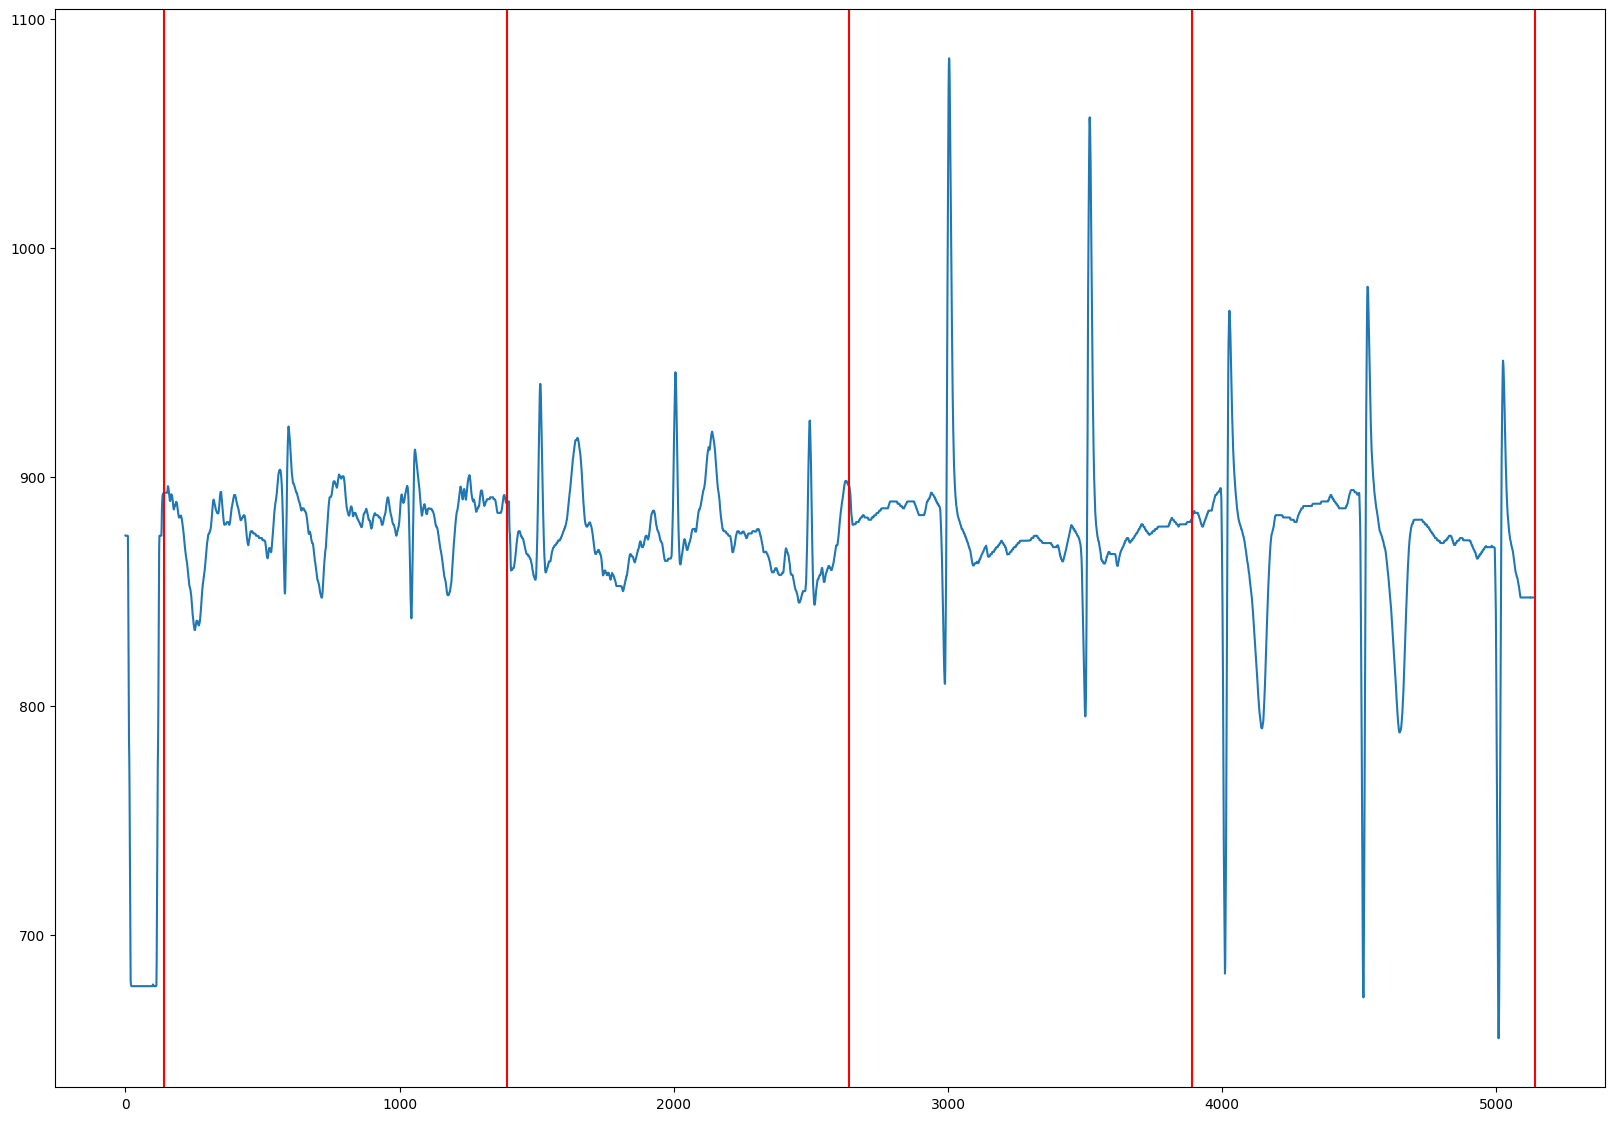

Track : 1


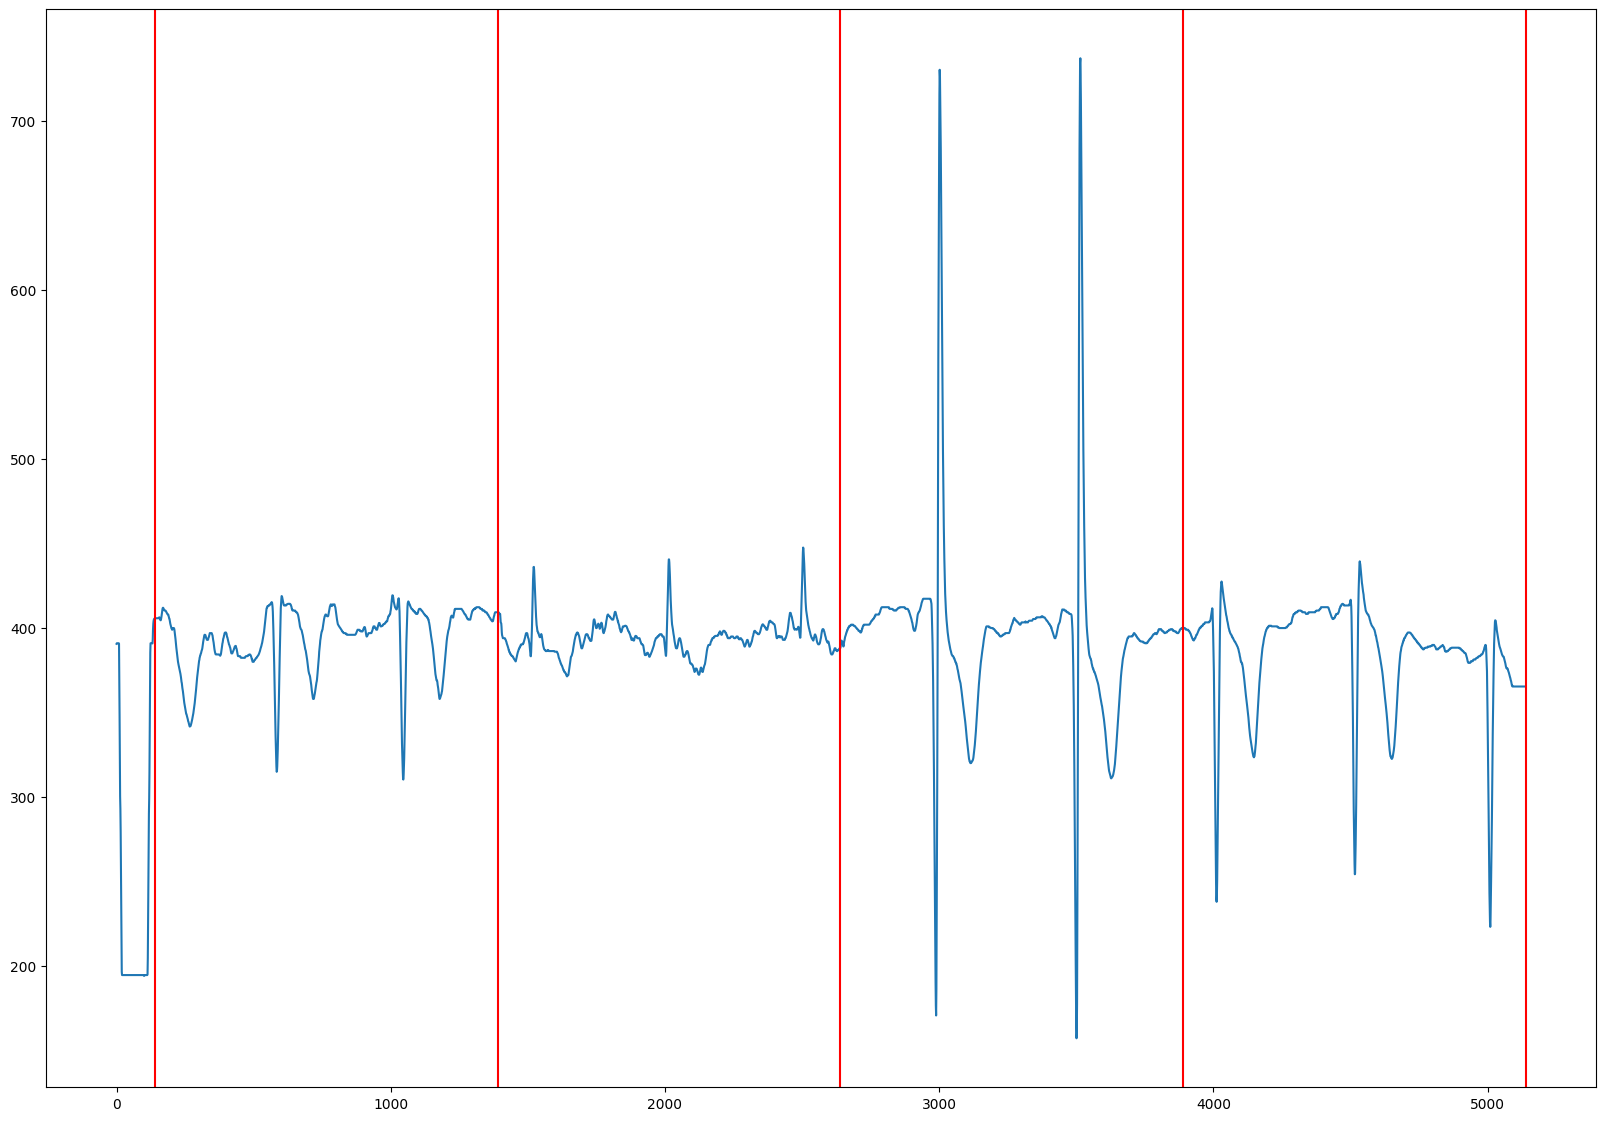

Track : 2


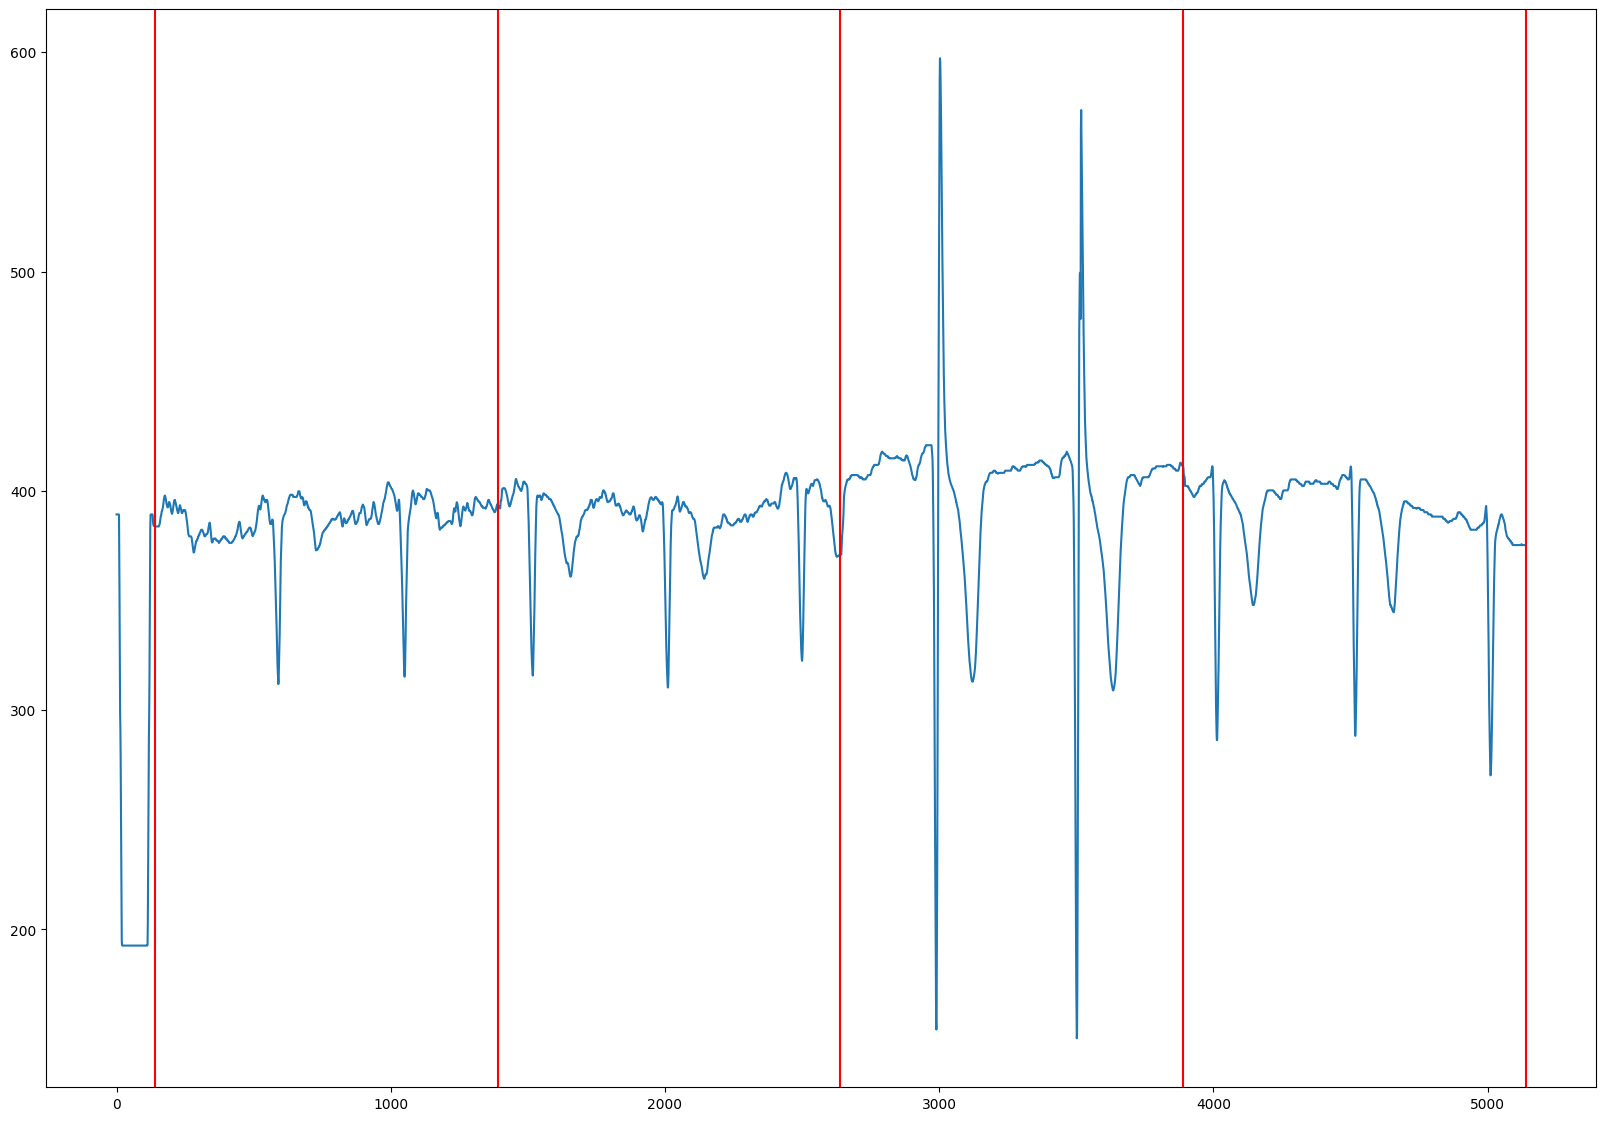

Track : 3


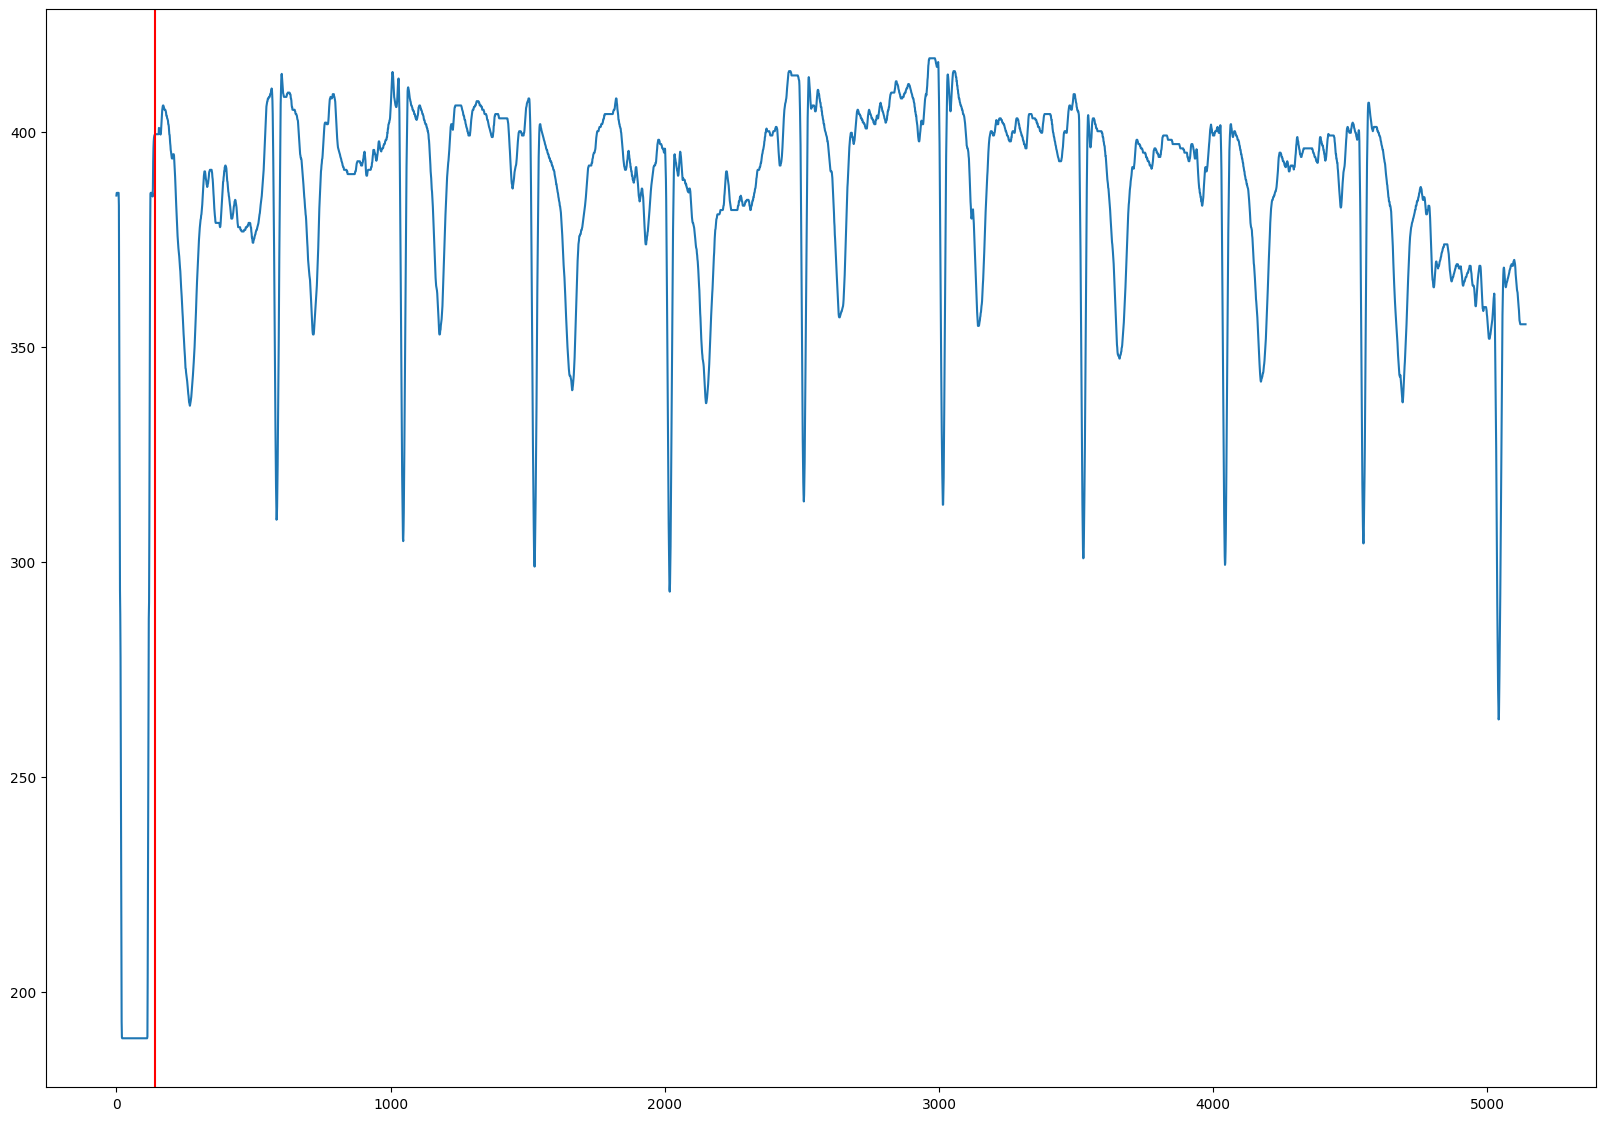

In [2]:
### Possible path to test ECGtizer ###
# Classic format
path1 = "data/PTB-XL/PDF/00009_hr.pdf"
#path1 = "../../../Documents/thèse/PDF2XML/ALL_Data/Elias/1_0.pdf"

#path1 = "../../../Downloads/img_1_page_0.jpeg"
#path1 = "../../../Downloads/img_1_page_2.pdf"
#path1 = "../../../Downloads/img_1_page_2.pdf"

### ECTtizer return an object with the extracted leads ###
"""
ECGtizer (path : path of the PDF to digitize, 
          DPI : DPI you want to use (500 seems to be optimal)
          verbose: Indicate the time of the different steps, 
          DEBUG: plot different steps)
"""
#extraction_method="fragmented" or "full" or "lazy"
ecg_extracted = ECGtizer (path1, 500, extraction_method="full", verbose = False, DEBUG = True)

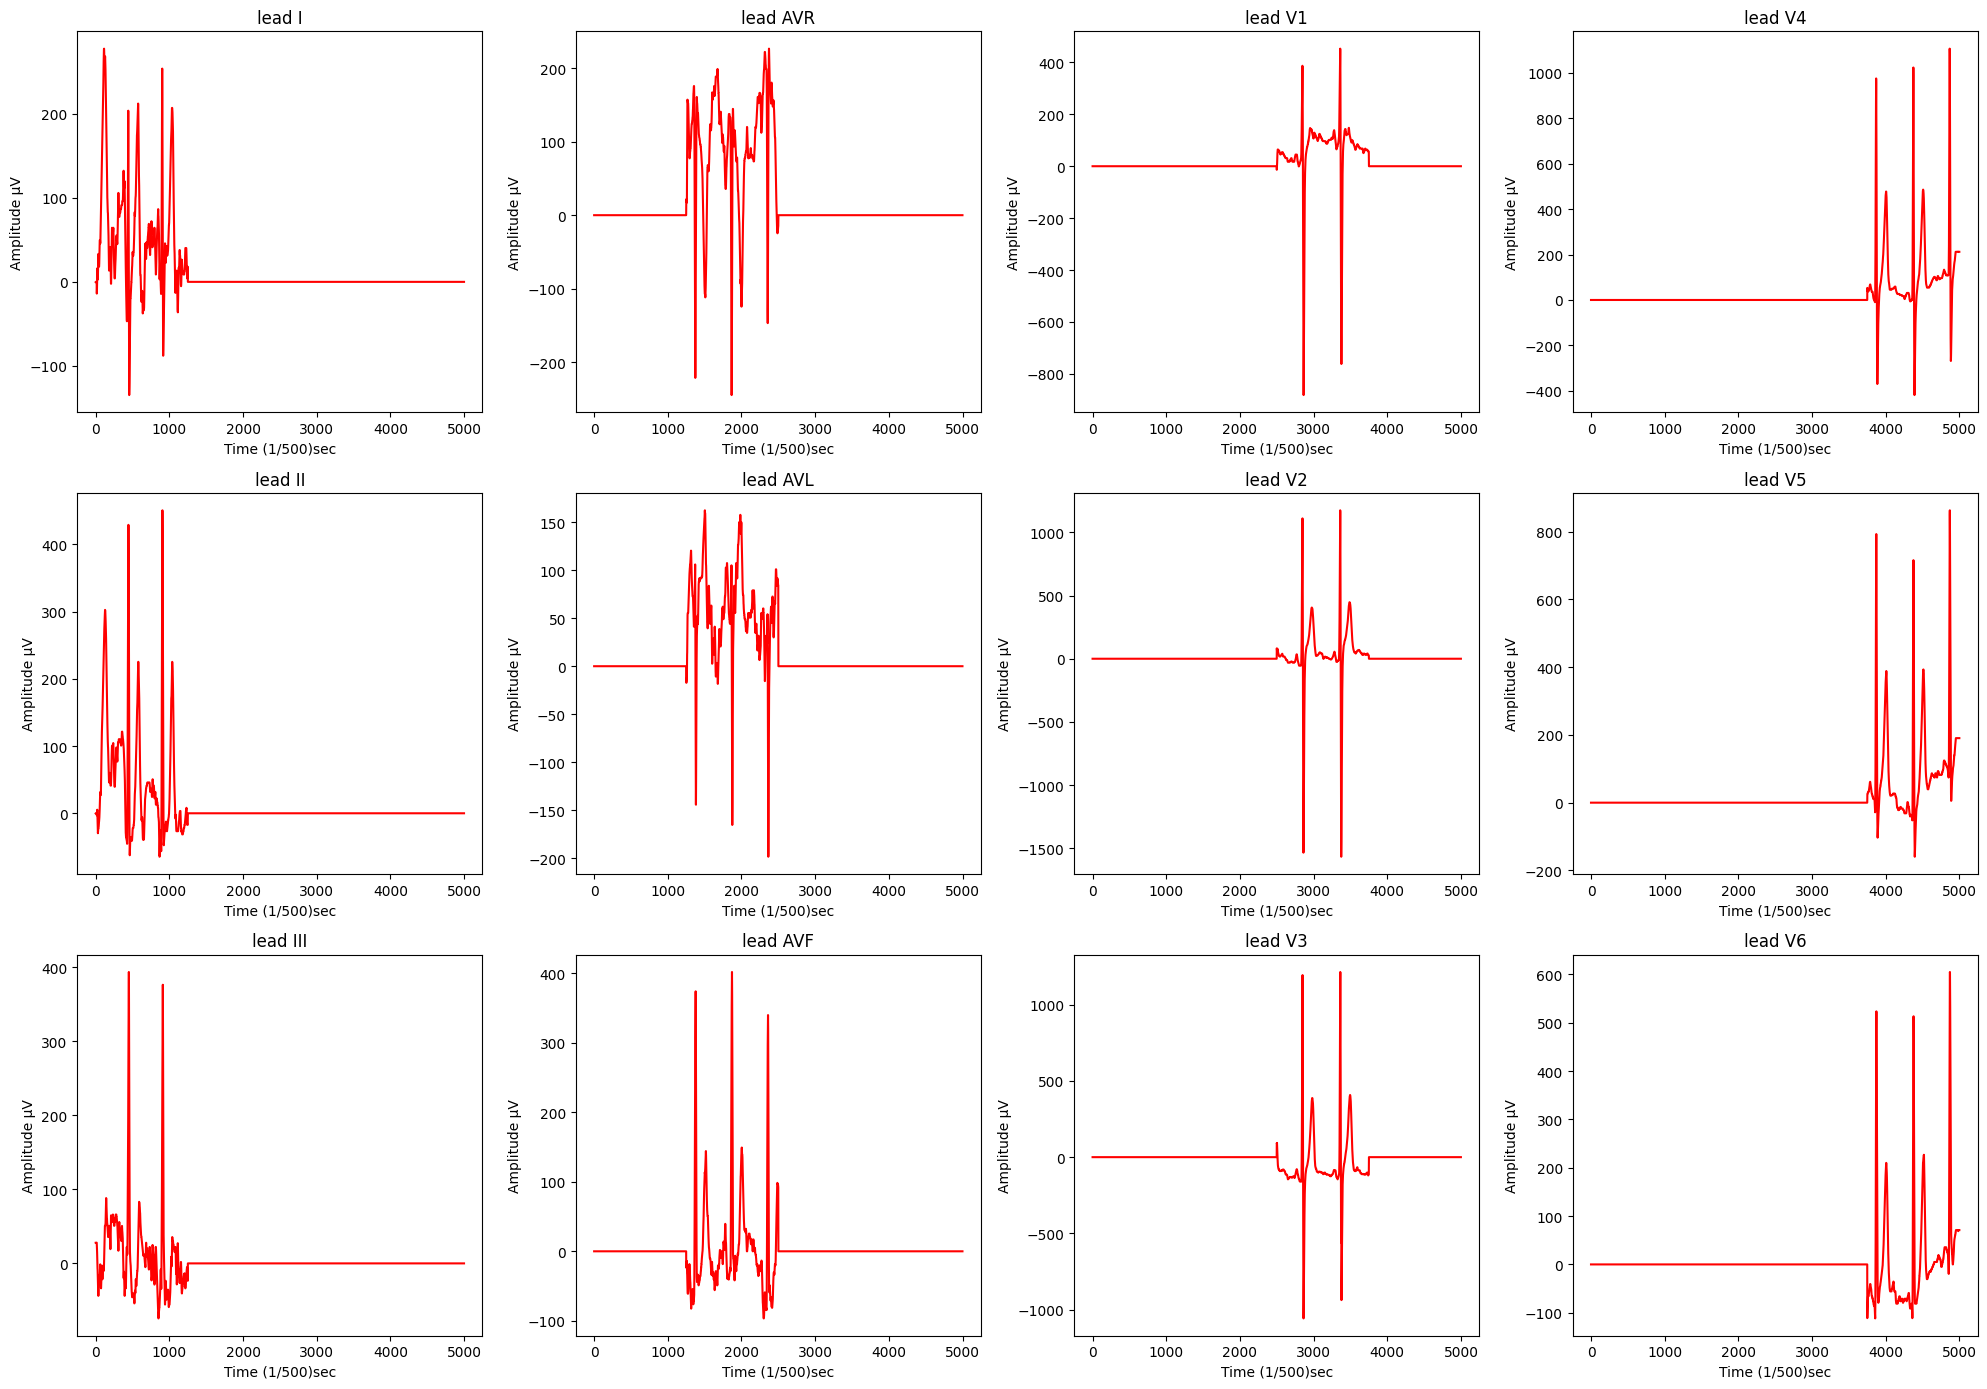

In [7]:
### ECTtizer can plot the leads of the extracted PDF ###
"""
ecgtizer.plot (lead(optional,str) : Name of the lead you want to plot it,
               begin(optional, int): The position on the lead you want to start, 
               end(optinal, int): The position on the lead you want to end, 
               completion(optional, bool): If you want to plot the complete lead,
               save(optinal, str): The location to save the plot)
"""
#ecg_extracted.plot(save = "../../thèse/PDF2XML/image_incomplete_lead", c = "black")
ecg_extracted.plot(c = "red")

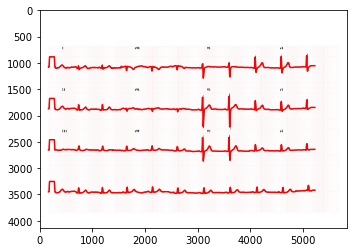

In [4]:
ecg_extracted.plot_over()

In [7]:
### ECTtizer save the extracted ECG in .xml format ###
"""
ecgtizer.save_xml (path_to_save (str): Name of the file you want to save the .xml)
"""
ecg_extracted.save_xml('data/PTB-XL/Digitized/00075_hr.xml')

[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


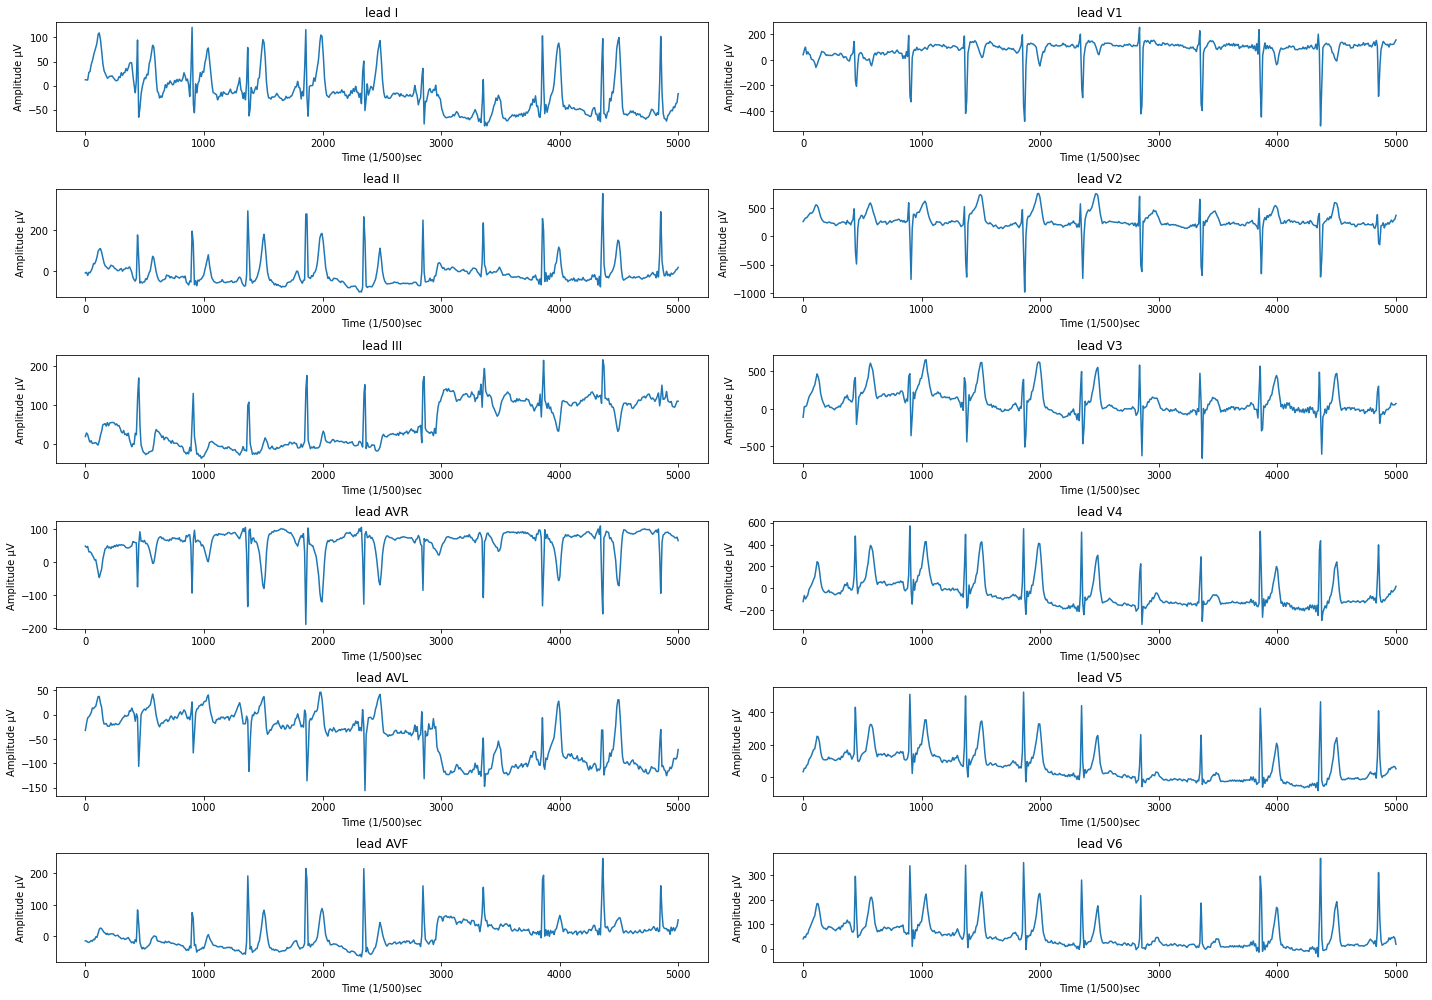

In [5]:
### ECTtizer is linked with ECGrecover. It allows to complete the signal###
"""
ecgtizer.completion (model_path (str): location of the model to use for the completion in .pth format,
                     device (torch.device): device to use for the completion)
"""
model_path = "model/Model_Completion.pth"
device = torch.device('cpu')
ecg_extracted.completion(model_path, device)

### ECTtizer save the completed ECG in .xml format ###
#ecg_extracted.save_xml_completed('data/PTB-XL/Digitized/00075_hr_completed.xml')


### ECTtizer can plot the leads of the extracted PDF ###
ecg_extracted.plot(completion=True)

# Digitising an entire file

In [13]:
# Specify the directory path
directory = "data/PTB-XL/PDF/"

# List all the files in the directory
files = os.listdir(directory)

# Print the list of files
for file in tqdm(files):
    try:
        ecg_extracted = ECGtizer (directory + file, 500, extraction_method="fragmented", verbose = False, DEBUG = False)
        ecg_extracted.save_xml('data/PTB-XL/Digitized/'+file.split('.')[0]+'.xml')
    except Exception as e:
        pass


100%|██████████| 2204/2204 [2:33:12<00:00,  4.17s/it]     


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
def read_csv_file(file):
    dic_sota = ["I","II","III","aVL", "aVR", "aVF","V1","V2","V3","V4","V5","V6"]
    try:
        test = pd.read_csv(file) 
        ecg = []
        for l in dic_sota:
            signal = test[l]
            indices_original = np.arange(len(signal))
            indices_nouveaux = np.linspace(0, len(signal) - 1, 5000)
            fonction_interpolation = interp1d(indices_original, signal, kind='linear')
            signal_interpole = fonction_interpolation(indices_nouveaux)
            ecg.append(signal_interpole)
    except FileNotFoundError:
        ecg = np.zeros((12,5000))
    return ecg

In [26]:
ecg = read_csv_file("data/PTB-XL/Original/00009_hr.csv")

In [28]:
print(np.array(ecg).shape)

(12, 5000)


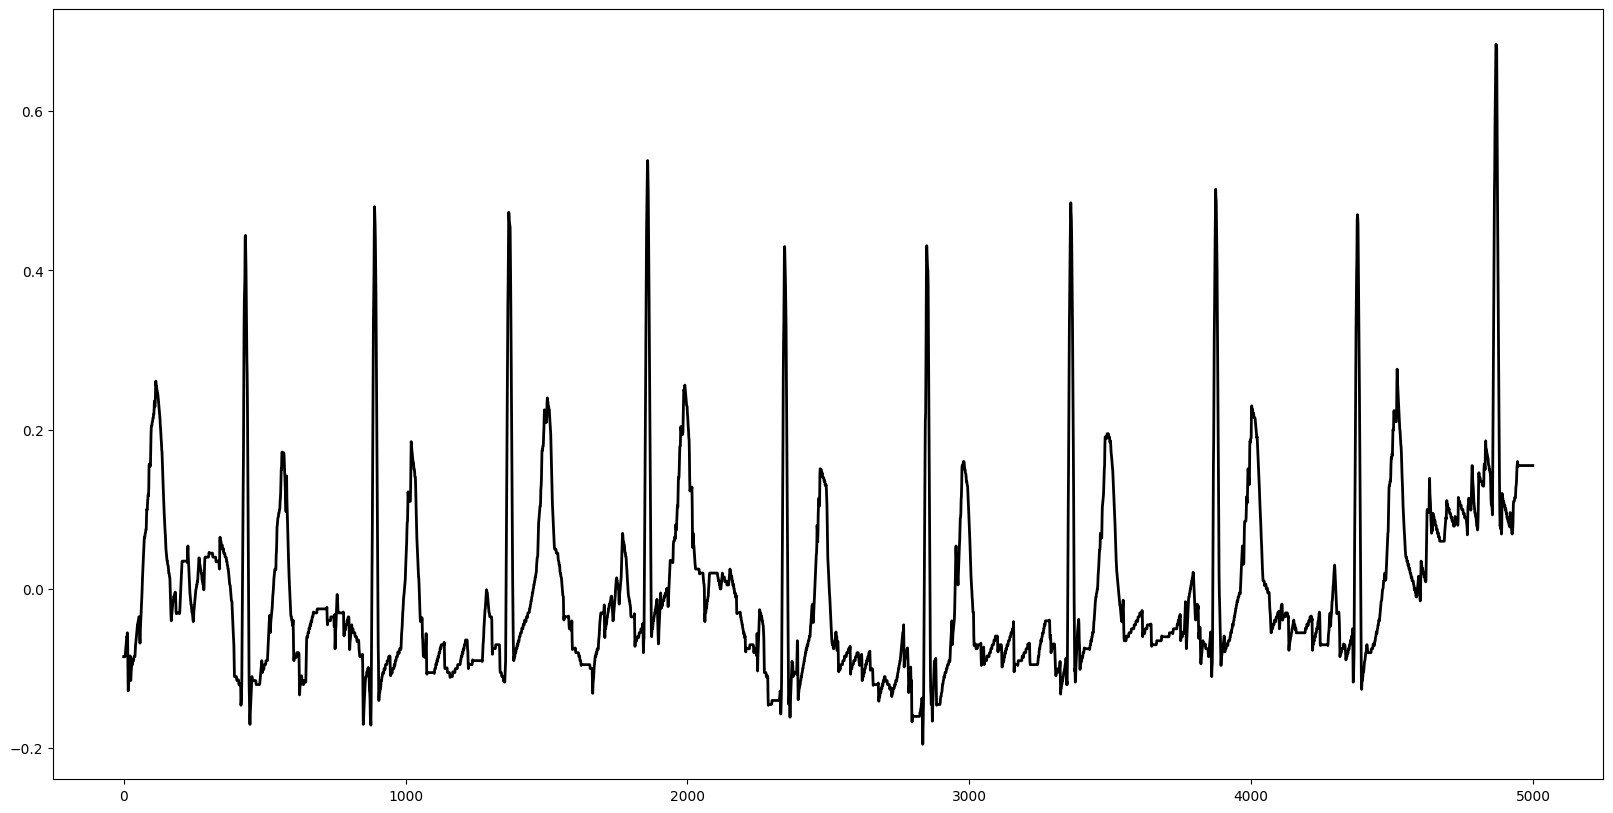

In [33]:
plt.figure(figsize=(20,10))
plt.plot(ecg[1], c = "black", linewidth = 2)
